In [71]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [62]:
sp500_tickers = pickle.load(open('iterables/sp500_tickers.pkl', 'rb'))
nasdaq_100_tickers = pickle.load(open('iterables/nasdaq_100_tickers.pkl', 'rb'))
time_intervals = pickle.load(open('iterables/time_intervals.pkl', 'rb'))

In [63]:
def pnl_calc(data):
    pnl_period = []
    for idx, row in data.iterrows():
        pred_diff = round(row['open'] - row['pred'], 2)
        actual_diff = round(row['open'] - row['close'], 2)
        # if trading in same direction 
        if ((pred_diff >= 0 and actual_diff >= 0) or 
            (pred_diff <= 0 and actual_diff <= 0)):
            pnl_period.append(abs(actual_diff))
        else: # assumes trade at open
            pnl_period.append(-1*abs(actual_diff))
    return np.array(pnl_period)

In [64]:
def padarray(A, size):
    t = size - len(A)
    return np.pad(A, pad_width=(0, t), mode='mean')

In [65]:
def get_pnl_for_time(bartime):
    pnl_data = []
    for ticker in sp500_tickers:
        data = pd.read_csv('data/predicted/{t}/{t}_{b}_pred.csv'.format(t=ticker,b=bartime))
        data = pnl_calc(data)
        pnl_data.append(data)
    for idx, row in enumerate(pnl_data):
        pnl_data[idx] = padarray(row, 252)
    pnl_data = np.array(pnl_data)
    return pnl_data

In [94]:
def plot_pnl(pnl_data, plt_col, plt_rows, gen_rand=False, with_title=False):
    fig, axs = plt.subplots(plt_rows, plt_col)
    plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
    ymin, ymax = -10, 10
    plotted_idx = []
    for i in range(0,plt_rows):
        for j in range(0,plt_col):
            idx = (i * plt_col) + j
            if gen_rand:
                idx = random.randint(0,251) # random index value
                while idx in plotted_idx:
                    idx = random.randint(0,251) # generated until get a new ticker
                plotted_idx.append(idx)
            # reached end
            if idx >= len(pnl_data):
                break
            color = 'r' if sum(pnl_data[idx]) < 0 else 'b'
            axs[i,j].plot(pnl_data[idx], linewidth=0.5, color=color)
            axs[i,j].set_ylim([ymin, ymax])
            if with_title:
                axs[i,j].set_title(sp500_tickers[idx], fontsize=10)
    for ax in axs.flat:
        ax.label_outer()

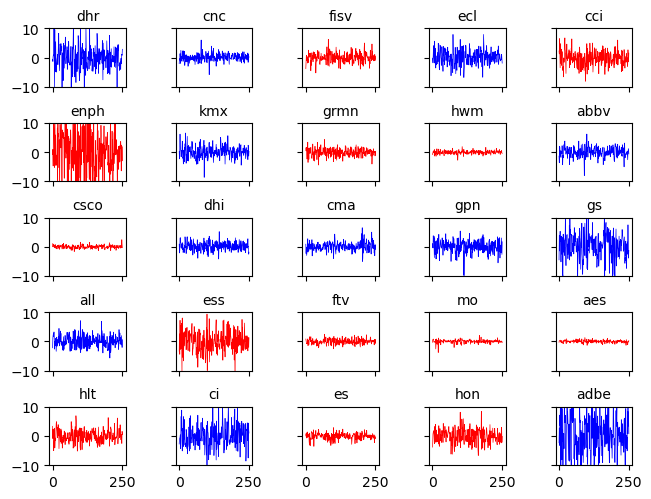

In [95]:
# generate 25 random samples
# set plt_col=25, plt_row=26 for max
pnl_day_data = get_pnl_for_time('1_day')
plot_pnl(pnl_day_data, plt_col=5, plt_rows=5, gen_rand=True, with_title=True)

In [93]:
# generate 25 random samples
# set plt_col=25, plt_row=26 for max
pnl_4h_data = get_pnl_for_time('4_hour')
plot_pnl(pnl_4h_data, plt_col=5, plt_rows=5, gen_rand=True, with_title=True)

TypeError: plot_pnl() got an unexpected keyword argument 'plt_col'

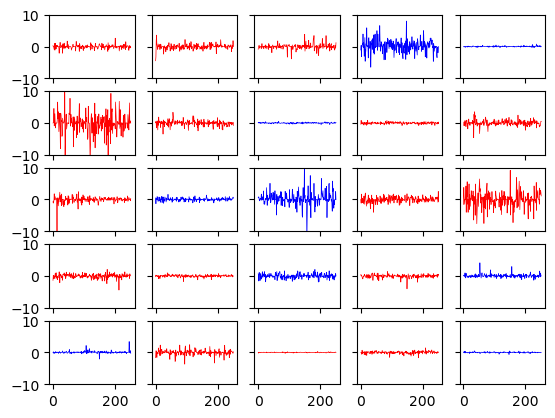

In [ ]:
# generate 25 random samples
# set plt_col=25, plt_row=26 for max
pnl_1h_data = get_pnl_for_time('1_hour')
plot_pnl(pnl_1h_data, plt_col=5, plt_rows=5, gen_rand=True, with_title=True)

In [70]:
# check if just trading in a single direction is better, i.e. is shorting less profitable than longing
